In [ ]:
!rm -rf *

In [ ]:
# Baixa as imagens de entradas X.npy
!gdown https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73

# Baixa as saídas desejadas Y.npy
!gdown https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7

Downloading...
From: https://drive.google.com/uc?id=1oSRay8phFA91RJoGH0tMmj86LBovKj73
To: /content/X.npy
33.8MB [00:00, 92.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_BQLcsgcYYsubtv4M80BVm4BEknrTOr7
To: /content/Y.npy
100% 165k/165k [00:00<00:00, 5.31MB/s]


In [ ]:
import time
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

from typing     import List
from struct     import unpack
from random     import sample
from datetime   import datetime
from matplotlib import pyplot as plt
from abc        import ABC,abstractmethod
from string     import ascii_letters, digits

TEMPLATE

In [ ]:
"""
  @class public class ABSTemplate extends ABC
  @brief Classe abstrata de template
"""
class ABSTemplate(ABC):
  def templateMethod():
    split_and_shuffle()
    random_sample_model()
    evaluate()    

  """
	  @brief Metodo abstrato que embaralha os pares de entradas e saídas
	  @param X - Entradas da rede
    @param Y - Saidas esperadas da rede
	  @return tuple 
  """
  @abstractmethod
  def split_and_shuffle(self, X, Y) -> tuple:
    pass

  """
	  @brief Metodo abstrato para mostrar uma imagem aleatória dentre as samples
	  @param Xv - Entradas de validação da rede
    @param Yv - Saidas de validação da rede
    @param model - Modelo da rede neural
	  @return void
  """
  @abstractmethod
  def random_sample_model(self, Xv, Yv, model) -> None:
    pass

  """
	  @brief Metodo abstrato que calcula a acurácia da rede para o par de 
    entradas e saídas desejadas da rede
	  @param x - Entrada desejada
    @param y_hat - Saída desejada
	  @return float
  """
  @abstractmethod
  def evaluate(self, x, y_hat) -> float:
    pass    

"""
  @class public class ConcreteTemplate extends ABSTemplate
  @brief Classe concreta de template
"""
class ConcreteTemplate(ABSTemplate):

  """
	  @brief Metodo que embaralha os pares de entradas e saídas
	  @param X - Entradas da rede
    @param Y - Saidas esperadas da rede
	  @return tuple 
  """
  def split_and_shuffle(self, X, Y) -> tuple:
    tot = len(X)

    indexes = np.arange(tot)
    np.random.shuffle(indexes)

    n = int((1 - 0.1)*tot)

    Xt = X[indexes[:n]]
    Yt = Y[indexes[:n]]
    Xv = X[indexes[n:]]
    Yv = Y[indexes[n:]]

    return Xt, Yt, Xv, Yv

  """
	  @brief Metodo para mostrar uma imagem aleatória dentre as samples
	  @param Xv - Entradas de validação da rede
    @param Yv - Saidas de validação da rede
    @param model - Modelo da rede neural
	  @return void
  """
  def random_sample_model(self,Xv, Yv, model) -> None:
    for _ in range(5):

      idx = np.random.randint(0, len(Yv))

      x = Xv[idx:idx+1,:,:]

      y = int(model(x).argmax(dim=1))
      y_hat = int(Yv[idx:idx+1,:].argmax(dim=1))

      print('y =', y, 'y_hat =', y_hat)

      x = x.cpu()
      
      plt.imshow(x[0,0,:,:], cmap='gray')
      plt.show()
    
    print("Exportando resultados obtidos...")

  """
	  @brief Metodo que calcula a acurácia da rede para o par de entradas e
    saídas desejadas da rede
	  @param x - Entrada desejada
    @param y_hat - Saída desejada
	  @return float
  """
  def evaluate(self,x, y_hat) -> float:
    y = cnn(x).argmax(dim=1)

    y_hat = y_hat.argmax(dim=1)

    return 100*float((y == y_hat).sum()) / len(y)


COMPOSITE

In [ ]:
"""
  @class public class convolutional_layers extends nn.Module
  @brief Classe responsável pela criação de layers convolucionais
"""
class convolutional_layers(nn.Module):
  conv1 = nn.Conv2d(1, 5, kernel_size= 6, stride= 2) # 1x64x64 -> 5x30x30
  conv2 = nn.Conv2d(5, 8, kernel_size= 3)            # 5x15x15 -> 8x13x13

"""
  @class public class polling_layers extends nn.Module
  @brief Classe responsável pela criação de layers de pooling
"""
class polling_layers(nn.Module):
  pool1 = nn.MaxPool2d(2, 2) # 5x30x30 -> 5x15x15
  pool2 = nn.MaxPool2d(2, 2) # 8x6x6

"""
  @class public class dropout_layers extends nn.Module
  @brief Classe responsável pela criação de layers de dropout
"""
class dropout_layers(nn.Module):
  drp1 = nn.Dropout2d(0.25)  # 1/4 do total dos neuronios serão dropados   

"""
  @class public class linear_layers extends nn.Module
  @brief Classe responsável pela criação de layers lineares
"""
class linear_layers(nn.Module):
  lin1 = nn.Linear(288, 10)

"""
  @class public class arch
  @brief Classe responsável pela gerência da arquitetura de layers da rede
"""
class arch():
  def __init__(self):
    """Constructor"""
    self._architecture = list()

  """
	  @brief Metodo que faz a adição de layers 
	  @param layer - lista de camadas da rede
	  @return void
  """
  def add_layers(self, layer) -> None:
    self._architecture.append(layer)

  """
	  @brief Metodo que faz a remoção de layers 
	  @param layer - lista de camadas da rede
	  @return void
  """
  def rm_layer(self, layer) -> None:
    self._architecture.pop(layer)

  """
	  @brief Metodo que retorna as layers 
	  @return arch
  """
  def get_layers(self) -> 'arch':
    return self._architecture
      
  """
	  @brief Metodo que printa as layers 
	  @return void
  """
  def print_arch(self) -> None:
    for architecture_l in self._architecture:
      print(architecture_l)

OBSERVER

In [ ]:
"""
  @class public class Observer extends ABC
  @brief Classe abstrata de Observer
"""
class Observer(ABC):
  
  """
    @brief Metodo abstrato de atualização da rede
    @param cnn - Rede neural 
    @return void
  """
  @abstractmethod
  def update(self, cnn) -> None:
    pass  

"""
  @class public class parametros_rede extends Observer
  @brief Classe que apresenta os parâmetros da rede criada
"""
class network_parameters(Observer):

  """
    @brief Metodo de atualização da rede que printa os parametros da rede 
    criada
    @param cnn - Rede neural 
    @return void
  """
  def update(self,cnn) -> None:
    print(f"Parametros da rede criada:\n {cnn.parameters}")

"""
  @class public class transfer_to_gpu extends Observer
  @brief Classe que transfere a rede para a GPU
"""
class transfer_to_gpu(Observer):

  """
    @brief Metodo que transfere a rede neural para a GPU, afins de acelerar 
    o processamnto
    @param cnn - Rede neural 
    @return void
  """
  def update(self, cnn) -> None:
    print("Transferindo a rede para a GPU...\n")
    gpu = torch.device("cuda:0")
    cnn = cnn.to(gpu)

"""
  @class public class Subject extends ABC
  @brief Classe abstrata responsável pela criação dos métodos que manipulam os subs
"""
class Subject(ABC):

  """
    @brief Metodo abstrato para anexar um observer ao subject.
    @param observer - observador 
    @return void
  """
  @abstractmethod
  def attach(self, observer) -> None:
    pass

  """
    @brief Metodo abstrato para desprender um observer do subject.
    @param observer - observador 
    @return void
  """
  @abstractmethod
  def detach(self, observer) -> None:
    pass

  """
    @brief Metodo abstrato para notificar o observer.
    @param observer - observador 
    @return void
  """
  @abstractmethod
  def notify(self) -> None:
    pass

"""
  @class public class ConcreteSubject extends Subject
  @brief Classe concreta de subject, possui um estado e notifica os
  observadores quando o estado alterar.
"""
class ConcreteSubject(Subject):

  _state: int = None

  """
  Lista de subs
  """
  _observers: List[Observer] = []

  """
    @brief Metodo que anexa um observer ao subject.
    @param observer - observador 
    @return void
  """
  def attach(self, observer: Observer) -> None:
    print("Subject: Anexando ao observador...")

    self._observers.append(observer)

  """
    @brief Metodo que desprende um observer do subject.
    @param observer - observador 
    @return void
  """
  def detach(self, observer: Observer) -> None:
    print("Subject: Removendo do observador...")
    self._observers.remove(observer)

  """
    @brief Metodo que notifica o observer.
    @param observer - observador 
    @return void
  """
  def notify(self,cnn) -> None:
    print("Subject: Notificando observadores...")

    for observer in self._observers:
      observer.update(cnn)

COMMAND


In [ ]:
"""
  @class public class Perform
  @brief Classe que manipula os comandos do pattern
"""
class Perform():
  def __init__(self):
    """Constructor"""
    self.performCNN = list()

  """
    @brief Metodo que adiciona o comando.
    @param cmd - comando 
    @return void
  """
  def add(self, cmd) -> None:
    self.performCNN.append(cmd)

  """
    @brief Metodo que executa o comando.
    @return void
  """
  def executa(self) -> None:
    for perform in self.performCNN:
      perform.execute()

  """
    @brief Metodo que limpa todos os comandos.
    @return void
  """
  def clear(self) -> None:
    self.performCNN.clear()
  
"""
  @class public class Comando
  @brief Classe abstrata dos comandos a serem implementados
"""
class Comando(ABC):

  """
    @brief Metodo abstrato que define comando
    @return void
  """
  @abstractmethod
  def execute(self) -> None:
      pass

"""
  @class public class Eval extends Comando
  @brief Classe responsável por avaliar a acurácia da rede
"""
class Eval(Comando):
  def __init__(self,Xt,Yt):
    """Constructor"""
    self.Xt = Xt
    self.Yt = Yt
    template = ConcreteTemplate() 

  """
    @brief Metodo para mostrar a taxa da acurácia da rede
    @return void
  """
  def execute(self) -> None:
    print("Acurácia: {:.2f}%".format(template.evaluate(self.Xt, self.Yt)))       
  
"""
  @class public class Err extends Comando
  @brief Classe responsável por avaliar o erro da rede
"""
class Err(Comando):
  def __init__(self,y,y_hat):
    """Constructor"""
    self.y = y
    self.y_hat = y_hat

  """
    @brief Metodo para mostrar o erro da rede
    @return void
  """ 
  def execute(self) -> None:
    print("Erro: {:.2f}%".format(loss(self.y, self.y_hat))) #entropia cruzada
  
"""
  @class public class Time extends Comando
  @brief Classe responsável por demonstrar o tempo de treinamento da rede
"""
class Time(Comando):
  def __init__(self,start_time):
    self.start_time = start_time

  """
    @brief Metodo para mostrar o tempo que o treinamento demorou para ser 
    realizado
    @return void
  """
  def execute(self) -> None:
    print("Tempo de treinamento: {:.2f}s".format(time.time() - self.start_time)) #Tempo de cada época

MEMENTO


In [ ]:
"""
  @class public class Memento extends ABC
  @brief Classe abstrata de memento
"""
class Memento(ABC):

  """
    @brief Metodo abstrato que retorna a data do memento
    @return str
  """
  @abstractmethod
  def get_date(self) -> str:
    pass

"""
  @class public class ConcreteMemento extends Memento
  @brief Classe contreta de memento
"""
class ConcreteMemento(Memento):
  def __init__(self, state):
    """Constructor"""
    self._state = state
    self._date = str(datetime.now())[:19]

    """
      Função do pytorch que salva o memento
    """
    torch.save(self._state.state_dict(),'memento_saved')

  """
    @brief Metodo abstrato que retorna o estado do modelo
    @return str
  """ 
  def get_state(self) -> str:
    self.model_teste = ConvNet(arch_nn,subject)
    self.model_teste.load_state_dict(torch.load('memento_saved'))
    
    return self.model_teste

  """
    @brief Metodo abstrato que retorna a data do memento
    @return str
  """
  def get_date(self) -> str:
    return self._date

"""
  @class public class Originator
  @brief Mantém algum estado importante que pode mudar com o tempo.
"""
class Originator():

  _state = None

  def __init__(self, state):
    """Constructor"""
    self._state = state

  """
    @brief Metodo que salva o memento criando um obj concreto do estado
    @return Memento
  """  
  def save(self) -> Memento:
    return ConcreteMemento(self._state)

  """
    @brief Metodo que restaura o originator de um obj memento
    @return Memento
  """  
  def restore(self, memento: Memento) -> None:
    self._state = memento.get_state()

    return self._state

"""
  @class public class Caretaker
  @brief O Caretaker não depende do Memento, não tem acesso ao estado do 
  originator, armazenado dentro do memento. Isto funciona com todas as
  lembranças por meio da interface base do Memento
"""
class Caretaker():
  def __init__(self, originator: Originator):
    """Constructor"""
    self._mementos = []
    self._originator = originator

  """
    @brief Metodo que realiza o backup, salvando uma lista de mementos
    @return void
  """    
  def backup(self) -> None:
    print("\nSalvando o estado...")

    self._mementos.append(self._originator.save())

  """
    @brief Metodo que realiza o restore do ultimo memento salvo
    @return void
  """    
  def restore_memento(self) -> 'memento':
    if not len(self._mementos):
        return

    memento = self._mementos.pop(-1)
    print("\nCarregando o estado...")

    return self._originator.restore(memento)

  """
    @brief Metodo que printa os mementos salvos
    @return Memento
  """      
  def show_history(self) -> None:
    print("\nLista de mementos:")

    for memento in self._mementos:
        print(memento.get_name())

APPLICATION

In [ ]:
"""
  @brief Metodo responsável por realizar o treinamento da rede neural
  @param Xv - Entradas de treinamento da rede
  @param Yv - Saidas de treinamento da rede
  @return float
"""  
def train(Xt,Yt) -> float:
  Errs = []

  p = Perform()

  """
    Laço de treinamento para 2001 épocas
  """
  for j in range(2001):
    
    start_time = time.time()

    """
      O treinamento é realizado em lotes de
      tamanho igual a 128 amostras
    """

    for i in range(0,len(Yt),128):

      """
        Separação dos lotes de entradas e saídas desejadas
      """

      x = Xt[i:i+128,:,:,:]
      y_hat = Yt[i:i+128,:].argmax(dim=1)

      """
        Zerado o gradiente do otimizador
      """
      opt.zero_grad()

      """
        Calculo da saída da rede neural
      """
      y = cnn(x)

      """
        Calculo do erro
      """
      e = loss(y, y_hat)
      Errs.append(e)

      """
        Calculo do gradiente para realizar o backpropagation
      """  
      e.backward()

      """
        Atualização dos parâmetros da rede
      """
      opt.step()

    """
    A cada 200 épocas imprimimos o erro do último lote, acurácia
    e tempo do treinamento
    """
    if not (j % 200):
      print()   

      p.clear()

      cmd1 = Eval(Xt, Yt)
      cmd2 = Err(y, y_hat)
      cmd3 = Time(start_time)

      p.add(cmd1)
      p.add(cmd2)
      p.add(cmd3)

      p.executa()

  return Errs

In [ ]:
"""
  @class public class ConvNet extends nn.Module 
  @brief Classe que implementa a rede neural
"""
class ConvNet(nn.Module):
  def __init__(self, arch, observadores):
    """Constructor"""
    super(ConvNet, self).__init__()
    self.list_layers = arch.get_layers()

    self.conv1 = self.list_layers[0].conv1  # 1x64x64 -> 5x30x30
    self.pool1 = self.list_layers[1].pool1  # 5x30x30 -> 5x15x15
    self.conv2 = self.list_layers[0].conv2  # 5x15x15 -> 8x13x13
    self.drp1  = self.list_layers[2].drp1   # 1/4 do total dos neuronios dropados                
    self.pool2 = self.list_layers[1].pool2  # 8x6x6
    self.lin1  = self.list_layers[3].lin1   # Conversão da matriz para vetor 
    
    observadores.notify(self)

  """
    @brief Essa função faz o cálculo da saída da rede neural
    @param x - Dado de entrada 
    @return x
  """ 
  def forward(self, x):
    x = self.conv1(x)
    x = torch.relu(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.drp1(x)
    x = torch.relu(x)
    x = self.pool2(x)
    x = x.view(-1, 288)
    x = self.lin1(x)
    return x

In [ ]:
if __name__ == "__main__":
  """
    Leitura dos dados
  """
  #Importação manual do dataset
  #X,Y = files.upload()

  X = np.load('X.npy')
  Y = np.load('Y.npy')

  """
    Definição das categorias de saida da rede
  """
  cats = [9,0,7,6,1,8,4,3,2,5]
  Y[:,cats] = Y[:,range(10)]

  template = ConcreteTemplate()

  """
    Separação e embaralhamento dos dados
  """
  Xt, Yt, Xv, Yv = template.split_and_shuffle(X, Y)
  
  Xt = torch.from_numpy(Xt)
  Yt = torch.from_numpy(Yt)
  Xv = torch.from_numpy(Xv)
  Yv = torch.from_numpy(Yv)

  """
    Ajuste de canais da imagem (único canal, imagem monocromática)
  """ 
  Xt = Xt.unsqueeze(1)
  Xv = Xv.unsqueeze(1)
      
  """
    Configuração e instância da rede neural
  """
  subject = ConcreteSubject()

  observer_a = network_parameters()
  observer_b = transfer_to_gpu()

  subject.attach(observer_a)
  subject.attach(observer_b)
  
  arch_nn = arch()

  arch_nn.add_layers(convolutional_layers())
  arch_nn.add_layers(polling_layers())
  arch_nn.add_layers(dropout_layers())
  arch_nn.add_layers(linear_layers())

  cnn = ConvNet(arch_nn,subject)

  opt = optim.Adam(cnn.parameters(), lr=0.0001)
  loss = nn.CrossEntropyLoss()

  """
    Transferência dos dados para a GPU
  """
  print("Transferindo o dados de treino e validação para a GPU...")
  gpu = torch.device("cuda:0")

  Xt = Xt.to(gpu, dtype=torch.float)
  Yt = Yt.to(gpu, dtype=torch.long)
  Xv = Xv.to(gpu, dtype=torch.float)
  Yv = Yv.to(gpu, dtype=torch.long)

Subject: Anexando ao observador...
Subject: Anexando ao observador...
Subject: Notificando observadores...
Parametros da rede criada:
 <bound method Module.parameters of ConvNet(
  (conv1): Conv2d(1, 5, kernel_size=(6, 6), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 8, kernel_size=(3, 3), stride=(1, 1))
  (drp1): Dropout2d(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=288, out_features=10, bias=True)
)>
Transferindo a rede para a GPU...

Transferindo o dados de treino e validação para a GPU...


In [ ]:
"""
  Treinamento da rede
"""
inc = input("Iniciar o treinamento da rede?[y/n]\n")
if inc == 'y' or inc == 'Y' or inc == '1':
  Errs = train(Xt,Yt)
else:
  print("Abortando o processo de treinamento...")
  exit()

Iniciar o treinamento da rede?[y/n]
y

Acurácia: 12.13%
Erro: 2.30%
Tempo de treinamento: 0.27s

Acurácia: 82.16%
Erro: 0.63%
Tempo de treinamento: 0.03s

Acurácia: 86.68%
Erro: 0.35%
Tempo de treinamento: 0.03s

Acurácia: 89.76%
Erro: 0.32%
Tempo de treinamento: 0.04s

Acurácia: 91.75%
Erro: 0.28%
Tempo de treinamento: 0.04s

Acurácia: 92.02%
Erro: 0.19%
Tempo de treinamento: 0.04s

Acurácia: 92.67%
Erro: 0.16%
Tempo de treinamento: 0.04s

Acurácia: 93.37%
Erro: 0.19%
Tempo de treinamento: 0.04s

Acurácia: 93.69%
Erro: 0.14%
Tempo de treinamento: 0.03s

Acurácia: 94.29%
Erro: 0.18%
Tempo de treinamento: 0.03s

Acurácia: 94.12%
Erro: 0.06%
Tempo de treinamento: 0.04s


In [ ]:
cnn.eval() #deslitamgamento do dropout

""" 
  Bkp da rede utilizando memento
""" 
originator = Originator(cnn)
caretaker = Caretaker(originator)
caretaker.backup()

""" 
  Restore da rede utilizando memento
""" 
new_model = caretaker.restore_memento()


Salvando o estado...

Carregando o estado...
Subject: Notificando observadores...
Parametros da rede criada:
 <bound method Module.parameters of ConvNet(
  (conv1): Conv2d(1, 5, kernel_size=(6, 6), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 8, kernel_size=(3, 3), stride=(1, 1))
  (drp1): Dropout2d(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=288, out_features=10, bias=True)
)>
Transferindo a rede para a GPU...



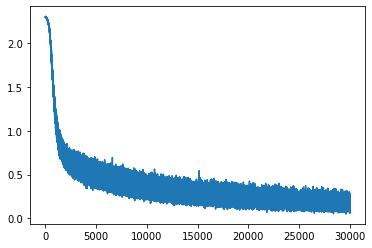

In [ ]:
"""
  Gráfico da taxa de erros da rede 
  ("curva de aprendizagem")
"""
plt.plot(Errs)
plt.show()

y = 4 y_hat = 4


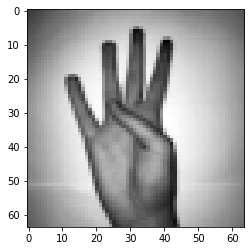

y = 6 y_hat = 6


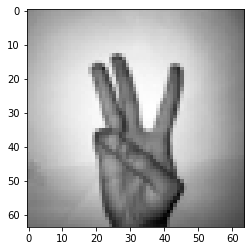

y = 9 y_hat = 9


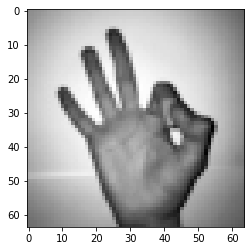

y = 8 y_hat = 9


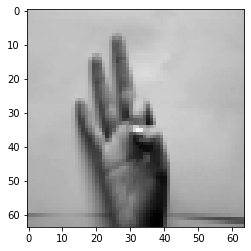

y = 8 y_hat = 9


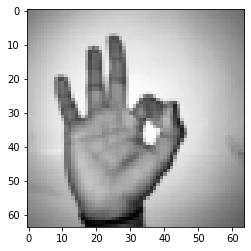

Exportando resultados obtidos...


In [ ]:
"""
  Validação da rede, utilizando dados 
  aleatórios de validação
"""
template.random_sample_model(Xv, Yv, new_model)